<a href="https://colab.research.google.com/github/drshahizan/SECP3843/blob/main/submission/raihanarahim/question4/question4.md/AA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd

# Load the JSON file into a DataFrame
data = '/content/drive/MyDrive/tweetsmodified.json'
df = pd.read_json(data)

# View the DataFrame

pd.set_option('display.max_columns', None)
df.head(5)

,_id,text,in_reply_to_status_id,retweet_count,contributors,created_at,geo,source,coordinates,in_reply_to_screen_name,truncated,entities,retweeted,place,user,favorited,in_reply_to_user_id,id,retweeted_status
0,{'$oid': '5c8eccb0caa187d17ca623f5'},eu preciso de terminar de fazer a minha tabela...,None,NaN,NaN,2010-09-02 18:11:23+00:00,None,web,None,None,False,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,None,"{'friends_count': {'$numberInt': '73'}, 'profi...",False,None,{'$numberLong': '22819396900'},NaN
1,{'$oid': '5c8eccb0caa187d17ca623f7'},I can't wait for #BoardwalkEmpire,None,NaN,NaN,2010-09-02 18:11:24+00:00,None,"<a href=""http://www.tweetdeck.com"" rel=""nofoll...",None,None,False,"{'user_mentions': [], 'urls': [], 'hashtags': ...",False,None,"{'friends_count': {'$numberInt': '204'}, 'prof...",False,None,{'$numberLong': '22819397300'},NaN
2,{'$oid': '5c8eccb0caa187d17ca623fa'},Oky nenek nya RT @wikigehol: Oky jd anak na yy...,None,NaN,NaN,2010-09-02 18:11:24+00:00,None,"<a href=""http://blackberry.com/twitter"" rel=""n...",None,None,False,{'user_mentions': [{'indices': [{'$numberInt':...,False,None,"{'friends_count': {'$numberInt': '363'}, 'prof...",False,None,{'$numberLong': '22819398000'},NaN
3,{'$oid': '5c8eccb0caa187d17ca623fc'},ど う で も い い,None,NaN,NaN,2010-09-02 18:11:24+00:00,None,"<a href=""http://www.echofon.com/"" rel=""nofollo...",None,None,False,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,None,"{'friends_count': {'$numberInt': '112'}, 'prof...",False,None,{'$numberLong': '22819397800'},NaN
4,{'$oid': '5c8eccb0caa187d17ca623fe'},@AdmireBiebs what ya think about to change my ...,None,NaN,NaN,2010-09-02 18:11:24+00:00,None,"<a href=""http://83degrees.com/to/powertwitter""...",None,AdmireBiebs,False,{'user_mentions': [{'indices': [{'$numberInt':...,False,None,"{'friends_count': {'$numberInt': '82'}, 'profi...",False,{'$numberInt': '64392486'},{'$numberLong': '22819397900'},NaN


In [30]:
print(df)

                                        _id  \
0      {'$oid': '5c8eccb0caa187d17ca623f5'}   
1      {'$oid': '5c8eccb0caa187d17ca623f7'}   
2      {'$oid': '5c8eccb0caa187d17ca623fa'}   
3      {'$oid': '5c8eccb0caa187d17ca623fc'}   
4      {'$oid': '5c8eccb0caa187d17ca623fe'}   
...                                     ...   
24827  {'$oid': '5c8eccb2caa187d17ca6ed05'}   
24828  {'$oid': '5c8eccb2caa187d17ca6ed06'}   
24829  {'$oid': '5c8eccb2caa187d17ca6ed07'}   
24830  {'$oid': '5c8eccb2caa187d17ca6ed08'}   
24831  {'$oid': '5c8eccb2caa187d17ca6ed0b'}   

                                                    text  \
0      eu preciso de terminar de fazer a minha tabela...   
1                      I can't wait for #BoardwalkEmpire   
2      Oky nenek nya RT @wikigehol: Oky jd anak na yy...   
3                                            ど う で も い い   
4      @AdmireBiebs what ya think about to change my ...   
...                                                  ...   
24827  @sittheh

In [31]:
print(len(df))

24832


In [32]:
print(df.columns)

Index(['_id', 'text', 'in_reply_to_status_id', 'retweet_count', 'contributors',
       'created_at', 'geo', 'source', 'coordinates', 'in_reply_to_screen_name',
       'truncated', 'entities', 'retweeted', 'place', 'user', 'favorited',
       'in_reply_to_user_id', 'id', 'retweeted_status'],
      dtype='object')


In [33]:
df.iloc[0]

_id                                     {'$oid': '5c8eccb0caa187d17ca623f5'}
text                       eu preciso de terminar de fazer a minha tabela...
in_reply_to_status_id                                                   None
retweet_count                                                            NaN
contributors                                                             NaN
created_at                                         2010-09-02 18:11:23+00:00
geo                                                                     None
source                                                                   web
coordinates                                                             None
in_reply_to_screen_name                                                 None
truncated                                                              False
entities                   {'user_mentions': [], 'urls': [], 'hashtags': []}
retweeted                                                              False

To predict whether tweets will go trending or not; we will determine using few featurer which are :


1.   followers count from column user
2.   friends count from column user
3.   links count from column text
4.   words count from column text
5.   hashtag count from column text
6.   tweet length from column text

Hence, other columns will be drop.



In [34]:
drop_cols = ['in_reply_to_status_id', 'geo', 'source', 'coordinates','in_reply_to_screen_name','truncated','place','favorited','in_reply_to_user_id']
df = df.drop(drop_cols, axis=1)
df

,_id,text,retweet_count,contributors,created_at,entities,retweeted,user,id,retweeted_status
0,{'$oid': '5c8eccb0caa187d17ca623f5'},eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,"{'friends_count': {'$numberInt': '73'}, 'profi...",{'$numberLong': '22819396900'},NaN
1,{'$oid': '5c8eccb0caa187d17ca623f7'},I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': ...",False,"{'friends_count': {'$numberInt': '204'}, 'prof...",{'$numberLong': '22819397300'},NaN
2,{'$oid': '5c8eccb0caa187d17ca623fa'},Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '363'}, 'prof...",{'$numberLong': '22819398000'},NaN
3,{'$oid': '5c8eccb0caa187d17ca623fc'},ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,"{'friends_count': {'$numberInt': '112'}, 'prof...",{'$numberLong': '22819397800'},NaN
4,{'$oid': '5c8eccb0caa187d17ca623fe'},@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '82'}, 'profi...",{'$numberLong': '22819397900'},NaN
...,...,...,...,...,...,...,...,...,...,...
24827,{'$oid': '5c8eccb2caa187d17ca6ed05'},@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '311'}, 'prof...",{'$numberLong': '22826114000'},NaN
24828,{'$oid': '5c8eccb2caa187d17ca6ed06'},shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,"{'user_mentions': [], 'urls': [{'indices': [{'...",False,"{'friends_count': {'$numberInt': '37'}, 'profi...",{'$numberLong': '22826113000'},NaN
24829,{'$oid': '5c8eccb2caa187d17ca6ed07'},@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,"{'hashtags': [], 'user_mentions': [{'indices':...",False,"{'contributors_enabled': False, 'profile_link_...",{'$numberLong': '22826114100'},NaN
24830,{'$oid': '5c8eccb2caa187d17ca6ed08'},"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,"{'user_mentions': [], 'urls': [{'indices': [{'...",False,"{'friends_count': {'$numberInt': '1018'}, 'pro...",{'$numberLong': '22826113200'},NaN


Remove the unwanted {} and element name in column _id, entities, user, id and retweeted status

In [35]:
df['_id'] = df['_id'].str['$oid']
df

,_id,text,retweet_count,contributors,created_at,entities,retweeted,user,id,retweeted_status
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,"{'friends_count': {'$numberInt': '73'}, 'profi...",{'$numberLong': '22819396900'},NaN
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': ...",False,"{'friends_count': {'$numberInt': '204'}, 'prof...",{'$numberLong': '22819397300'},NaN
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '363'}, 'prof...",{'$numberLong': '22819398000'},NaN
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,"{'user_mentions': [], 'urls': [], 'hashtags': []}",False,"{'friends_count': {'$numberInt': '112'}, 'prof...",{'$numberLong': '22819397800'},NaN
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '82'}, 'profi...",{'$numberLong': '22819397900'},NaN
...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,{'user_mentions': [{'indices': [{'$numberInt':...,False,"{'friends_count': {'$numberInt': '311'}, 'prof...",{'$numberLong': '22826114000'},NaN
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,"{'user_mentions': [], 'urls': [{'indices': [{'...",False,"{'friends_count': {'$numberInt': '37'}, 'profi...",{'$numberLong': '22826113000'},NaN
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,"{'hashtags': [], 'user_mentions': [{'indices':...",False,"{'contributors_enabled': False, 'profile_link_...",{'$numberLong': '22826114100'},NaN
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,"{'user_mentions': [], 'urls': [{'indices': [{'...",False,"{'friends_count': {'$numberInt': '1018'}, 'pro...",{'$numberLong': '22826113200'},NaN


Seperate items in entities into columns.

In [36]:
df['user_mentions'] = df['entities'].apply(lambda x: x.get('user_mentions', []))
df['urls'] = df['entities'].apply(lambda x: x.get('urls', []))
df['hashtags'] = df['entities'].apply(lambda x: x.get('hashtags', []))
# View the updated DataFrame
print(df.head())

                        _id  \
0  5c8eccb0caa187d17ca623f5   
1  5c8eccb0caa187d17ca623f7   
2  5c8eccb0caa187d17ca623fa   
3  5c8eccb0caa187d17ca623fc   
4  5c8eccb0caa187d17ca623fe   

                                                text  retweet_count  \
0  eu preciso de terminar de fazer a minha tabela...            NaN   
1                  I can't wait for #BoardwalkEmpire            NaN   
2  Oky nenek nya RT @wikigehol: Oky jd anak na yy...            NaN   
3                                        ど う で も い い            NaN   
4  @AdmireBiebs what ya think about to change my ...            NaN   

   contributors                created_at  \
0           NaN 2010-09-02 18:11:23+00:00   
1           NaN 2010-09-02 18:11:24+00:00   
2           NaN 2010-09-02 18:11:24+00:00   
3           NaN 2010-09-02 18:11:24+00:00   
4           NaN 2010-09-02 18:11:24+00:00   

                                            entities  retweeted  \
0  {'user_mentions': [], 'urls': [], 'hashtags':

In [37]:
df.iloc[0]

_id                                          5c8eccb0caa187d17ca623f5
text                eu preciso de terminar de fazer a minha tabela...
retweet_count                                                     NaN
contributors                                                      NaN
created_at                                  2010-09-02 18:11:23+00:00
entities            {'user_mentions': [], 'urls': [], 'hashtags': []}
retweeted                                                       False
user                {'friends_count': {'$numberInt': '73'}, 'profi...
id                                     {'$numberLong': '22819396900'}
retweeted_status                                                  NaN
user_mentions                                                      []
urls                                                               []
hashtags                                                           []
Name: 0, dtype: object

Then, entities column can be dropped.

In [38]:
drop_cols = ['entities']
df = df.drop(drop_cols, axis=1)
df

,_id,text,retweet_count,contributors,created_at,retweeted,user,id,retweeted_status,user_mentions,urls,hashtags
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,"{'friends_count': {'$numberInt': '73'}, 'profi...",{'$numberLong': '22819396900'},NaN,[],[],[]
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,"{'friends_count': {'$numberInt': '204'}, 'prof...",{'$numberLong': '22819397300'},NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu..."
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,"{'friends_count': {'$numberInt': '363'}, 'prof...",{'$numberLong': '22819398000'},NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[]
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,"{'friends_count': {'$numberInt': '112'}, 'prof...",{'$numberLong': '22819397800'},NaN,[],[],[]
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,"{'friends_count': {'$numberInt': '82'}, 'profi...",{'$numberLong': '22819397900'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,"{'friends_count': {'$numberInt': '311'}, 'prof...",{'$numberLong': '22826114000'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[]
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,"{'friends_count': {'$numberInt': '37'}, 'profi...",{'$numberLong': '22826113000'},NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[]
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,"{'contributors_enabled': False, 'profile_link_...",{'$numberLong': '22826114100'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[]
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,"{'friends_count': {'$numberInt': '1018'}, 'pro...",{'$numberLong': '22826113200'},NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[]


In [39]:
df.iloc[0]["user"]

{'friends_count': {'$numberInt': '73'},
 'profile_sidebar_fill_color': '768575',
 'location': '',
 'verified': False,
 'follow_request_sent': None,
 'favourites_count': {'$numberInt': '1'},
 'profile_sidebar_border_color': '1c9dbd',
 'profile_image_url': 'http://a2.twimg.com/profile_images/1036412454/OgAAADXK9q6kaxrvfwQTINH66RVLAH9YHb-veRTA4FaWb9KtbGGV_yKTGzmvzTfJidqAb5gK_mpspIE-MIvAASGH2CwAm1T1UIPQk0-HS8x_TV5kdnW30nch7ODk-1_normal.jpg',
 'geo_enabled': False,
 'created_at': 'Fri Jul 03 21:44:05 +0000 2009',
 'description': 'só os loucos sabem (:',
 'time_zone': 'Brasilia',
 'url': 'http://http://www.orkut.com.br/Main#Profile?uid=1433295880233078770',
 'screen_name': 'Bia_cunha1',
 'notifications': None,
 'profile_background_color': '081114',
 'listed_count': {'$numberInt': '0'},
 'lang': 'en',
 'profile_background_image_url': 'http://a1.twimg.com/profile_background_images/133178546/biatwitter.jpg',
 'statuses_count': {'$numberInt': '3504'},
 'following': None,
 'profile_text_color': '

From column user, extract friends_count and followers_count.

In [40]:
df['friends_count'] = df['user'].apply(lambda x: x.get('friends_count', []))
df['followers_count'] = df['user'].apply(lambda x: x.get('followers_count', []))
df['favourites_count'] = df['user'].apply(lambda x: x.get('favourites_count', []))
# View the updated DataFrame
print(df.head())

                        _id  \
0  5c8eccb0caa187d17ca623f5   
1  5c8eccb0caa187d17ca623f7   
2  5c8eccb0caa187d17ca623fa   
3  5c8eccb0caa187d17ca623fc   
4  5c8eccb0caa187d17ca623fe   

                                                text  retweet_count  \
0  eu preciso de terminar de fazer a minha tabela...            NaN   
1                  I can't wait for #BoardwalkEmpire            NaN   
2  Oky nenek nya RT @wikigehol: Oky jd anak na yy...            NaN   
3                                        ど う で も い い            NaN   
4  @AdmireBiebs what ya think about to change my ...            NaN   

   contributors                created_at  retweeted  \
0           NaN 2010-09-02 18:11:23+00:00      False   
1           NaN 2010-09-02 18:11:24+00:00      False   
2           NaN 2010-09-02 18:11:24+00:00      False   
3           NaN 2010-09-02 18:11:24+00:00      False   
4           NaN 2010-09-02 18:11:24+00:00      False   

                                                u

now, we can drop the user column.

In [41]:
drop_cols = ['user']
df = df.drop(drop_cols, axis=1)
df

,_id,text,retweet_count,contributors,created_at,retweeted,id,retweeted_status,user_mentions,urls,hashtags,friends_count,followers_count,favourites_count
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,{'$numberLong': '22819396900'},NaN,[],[],[],{'$numberInt': '73'},{'$numberInt': '102'},{'$numberInt': '1'}
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397300'},NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu...",{'$numberInt': '204'},{'$numberInt': '24'},{'$numberInt': '0'}
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819398000'},NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[],{'$numberInt': '363'},{'$numberInt': '679'},{'$numberInt': '0'}
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397800'},NaN,[],[],[],{'$numberInt': '112'},{'$numberInt': '124'},{'$numberInt': '27'}
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397900'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],{'$numberInt': '82'},{'$numberInt': '219'},{'$numberInt': '3'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114000'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],{'$numberInt': '311'},{'$numberInt': '238'},{'$numberInt': '275'}
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113000'},NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[],{'$numberInt': '37'},{'$numberInt': '9'},{'$numberInt': '1'}
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114100'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],{'$numberInt': '46'},{'$numberInt': '15'},{'$numberInt': '0'}
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113200'},NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[],{'$numberInt': '1018'},{'$numberInt': '1053'},{'$numberInt': '0'}


Remove unwanted characters from friends_count and followers_count.

In [42]:
df['friends_count'] = df['friends_count'].str['$numberInt']
df

,_id,text,retweet_count,contributors,created_at,retweeted,id,retweeted_status,user_mentions,urls,hashtags,friends_count,followers_count,favourites_count
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,{'$numberLong': '22819396900'},NaN,[],[],[],73,{'$numberInt': '102'},{'$numberInt': '1'}
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397300'},NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu...",204,{'$numberInt': '24'},{'$numberInt': '0'}
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819398000'},NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[],363,{'$numberInt': '679'},{'$numberInt': '0'}
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397800'},NaN,[],[],[],112,{'$numberInt': '124'},{'$numberInt': '27'}
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397900'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],82,{'$numberInt': '219'},{'$numberInt': '3'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114000'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],311,{'$numberInt': '238'},{'$numberInt': '275'}
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113000'},NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[],37,{'$numberInt': '9'},{'$numberInt': '1'}
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114100'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],46,{'$numberInt': '15'},{'$numberInt': '0'}
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113200'},NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[],1018,{'$numberInt': '1053'},{'$numberInt': '0'}


In [43]:
df['followers_count'] = df['followers_count'].str['$numberInt']
df

,_id,text,retweet_count,contributors,created_at,retweeted,id,retweeted_status,user_mentions,urls,hashtags,friends_count,followers_count,favourites_count
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,{'$numberLong': '22819396900'},NaN,[],[],[],73,102,{'$numberInt': '1'}
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397300'},NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu...",204,24,{'$numberInt': '0'}
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819398000'},NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[],363,679,{'$numberInt': '0'}
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397800'},NaN,[],[],[],112,124,{'$numberInt': '27'}
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,{'$numberLong': '22819397900'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],82,219,{'$numberInt': '3'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114000'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],311,238,{'$numberInt': '275'}
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113000'},NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[],37,9,{'$numberInt': '1'}
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,{'$numberLong': '22826114100'},NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],46,15,{'$numberInt': '0'}
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,{'$numberLong': '22826113200'},NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[],1018,1053,{'$numberInt': '0'}


Remove unwanted character from id too.

In [44]:
df['id'] = df['id'].str['$numberLong']
df

,_id,text,retweet_count,contributors,created_at,retweeted,id,retweeted_status,user_mentions,urls,hashtags,friends_count,followers_count,favourites_count
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,22819396900,NaN,[],[],[],73,102,{'$numberInt': '1'}
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397300,NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu...",204,24,{'$numberInt': '0'}
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819398000,NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[],363,679,{'$numberInt': '0'}
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397800,NaN,[],[],[],112,124,{'$numberInt': '27'}
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397900,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],82,219,{'$numberInt': '3'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,22826114000,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],311,238,{'$numberInt': '275'}
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,22826113000,NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[],37,9,{'$numberInt': '1'}
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,22826114100,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],46,15,{'$numberInt': '0'}
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,22826113200,NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[],1018,1053,{'$numberInt': '0'}


In [51]:
df['favourites_count'] = df['favourites_count'].str['$numberInt']
df

,_id,text,retweet_count,contributors,created_at,retweeted,id,retweeted_status,user_mentions,urls,hashtags,friends_count,followers_count,favourites_count,hashtag_count,links_count,words_count,tweet_length
0,5c8eccb0caa187d17ca623f5,eu preciso de terminar de fazer a minha tabela...,NaN,NaN,2010-09-02 18:11:23+00:00,False,22819396900,NaN,[],[],[],73,102,1,0,0,13,66
1,5c8eccb0caa187d17ca623f7,I can't wait for #BoardwalkEmpire,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397300,NaN,[],[],"[{'text': 'BoardwalkEmpire', 'indices': [{'$nu...",204,24,0,1,0,5,33
2,5c8eccb0caa187d17ca623fa,Oky nenek nya RT @wikigehol: Oky jd anak na yy...,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819398000,NaN,"[{'indices': [{'$numberInt': '17'}, {'$numberI...",[],[],363,679,0,0,0,24,140
3,5c8eccb0caa187d17ca623fc,ど う で も い い,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397800,NaN,[],[],[],112,124,27,0,0,6,11
4,5c8eccb0caa187d17ca623fe,@AdmireBiebs what ya think about to change my ...,NaN,NaN,2010-09-02 18:11:24+00:00,False,22819397900,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],82,219,3,0,0,22,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24827,5c8eccb2caa187d17ca6ed05,@sittheheckdown ;___; omg bb I am so sorry. om...,NaN,NaN,2010-09-02 20:03:53+00:00,False,22826114000,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],311,238,275,0,0,10,60
24828,5c8eccb2caa187d17ca6ed06,shares http://tinyurl.com/24u6dvx Teen Top on ...,NaN,NaN,2010-09-02 20:03:52+00:00,False,22826113000,NaN,[],"[{'indices': [{'$numberInt': '7'}, {'$numberIn...",[],37,9,1,0,2,7,78
24829,5c8eccb2caa187d17ca6ed07,@TIMBALADA_TWT uhuuuuuuuuuuuuuuuuuuuuuuu!!!!!...,NaN,NaN,2010-09-02 20:03:53+00:00,False,22826114100,NaN,"[{'indices': [{'$numberInt': '0'}, {'$numberIn...",[],[],46,15,0,0,0,2,58
24830,5c8eccb2caa187d17ca6ed08,"» Ben Hariç Herkes ölsün (Türkçe Dublaj, 2008)...",NaN,NaN,2010-09-02 20:03:52+00:00,False,22826113200,NaN,[],"[{'indices': [{'$numberInt': '57'}, {'$numberI...",[],1018,1053,0,0,1,11,93


Next, we will create column hashtag_count, word_count and links_count retrieve from text column.

In [52]:
df["hashtag_count"] = df.apply(lambda tweet: tweet["text"].count("#"),axis=1)
df["hashtag_count"]

0        0
1        1
2        0
3        0
4        0
        ..
24827    0
24828    0
24829    0
24830    0
24831    1
Name: hashtag_count, Length: 24832, dtype: int64

In [53]:
df["links_count"] = df.apply(lambda tweet: tweet["text"].count("http"),axis=1)
df["links_count"]

0        0
1        0
2        0
3        0
4        0
        ..
24827    0
24828    2
24829    0
24830    1
24831    0
Name: links_count, Length: 24832, dtype: int64

In [54]:
df["words_count"] = df.apply(lambda tweet: len(tweet["text"].split()),axis=1)
df["words_count"]

0        13
1         5
2        24
3         6
4        22
         ..
24827    10
24828     7
24829     2
24830    11
24831    17
Name: words_count, Length: 24832, dtype: int64

In [55]:
df["tweet_length"] = df.apply(lambda tweet: len(tweet["text"]), axis=1)
df["tweet_length"]

0         66
1         33
2        140
3         11
4        127
        ... 
24827     60
24828     78
24829     58
24830     93
24831    107
Name: tweet_length, Length: 24832, dtype: int64

Next, we will combine all features in one table.

In [56]:
features = df[["tweet_length","followers_count","favourites_count","friends_count","links_count","words_count","hashtag_count"]]
features

,tweet_length,followers_count,favourites_count,friends_count,links_count,words_count,hashtag_count
0,66,102,1,73,0,13,0
1,33,24,0,204,0,5,1
2,140,679,0,363,0,24,0
3,11,124,27,112,0,6,0
4,127,219,3,82,0,22,0
...,...,...,...,...,...,...,...
24827,60,238,275,311,0,10,0
24828,78,9,1,37,2,7,0
24829,58,15,0,46,0,2,0
24830,93,1053,0,1018,1,11,0


Define Viral Tweets.

Using engagement ratio where a higher engagement ratio may indicate a viral tweet.

Firstly, change the datatype for both attributes.

In [58]:
# Convert columns to numeric data types
df['favourites_count'] = pd.to_numeric(df['favourites_count'])
df['followers_count'] = pd.to_numeric(df['followers_count'])


In [59]:
df['engagement_ratio_favorites'] = df['favourites_count'] / df['followers_count']

In [60]:
df['engagement_ratio_favorites']

0        0.009804
1        0.000000
2        0.000000
3        0.217742
4        0.013699
           ...   
24827    1.155462
24828    0.111111
24829    0.000000
24830    0.000000
24831    0.000000
Name: engagement_ratio_favorites, Length: 24832, dtype: float64

In [61]:
df['engagement_ratio_favorites'] .median()

0.005714285714285714

In [63]:
import numpy as np # linear algebra
df["is_viral"] = np.where(df["engagement_ratio_favorites"]>df["engagement_ratio_favorites"].median(), 1, 0)
df["is_viral"]

0        1
1        0
2        0
3        1
4        1
        ..
24827    1
24828    1
24829    0
24830    0
24831    0
Name: is_viral, Length: 24832, dtype: int64

In [65]:
labels = df["is_viral"]
labels

0        1
1        0
2        0
3        1
4        1
        ..
24827    1
24828    1
24829    0
24830    0
24831    0
Name: is_viral, Length: 24832, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.19618731, -0.08555605, -0.08226935, ..., -0.50158221,
         0.21222531, -0.31823763],
       [-1.01099714, -0.09595522, -0.083362  , ..., -0.50158221,
        -0.90122892,  1.48351265],
       [ 1.630962  , -0.00862887, -0.083362  , ..., -0.50158221,
         1.74322487, -0.31823763],
       ...,
       [-0.39371696, -0.09715512, -0.083362  , ..., -0.50158221,
        -1.31877425, -0.31823763],
       [ 0.47047528,  0.04123381, -0.083362  , ...,  1.85782097,
        -0.06613825, -0.31823763],
       [ 0.81615217, -0.08848915, -0.083362  , ..., -0.50158221,
         0.76895242,  1.48351265]])

Now we will create divide the data to Training set and Test set.

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19865, 7)
(4967, 7)
(19865,)
(4967,)


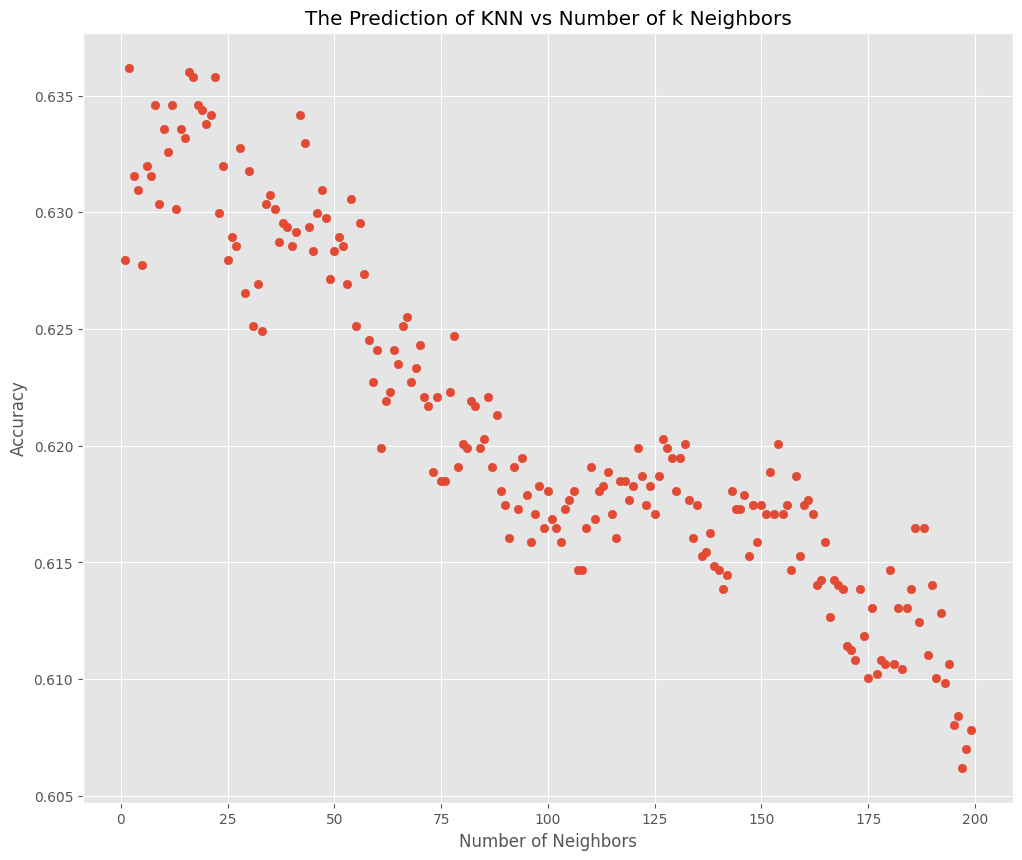

In [68]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
scores = list()
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.scatter(range(1,200), scores)
plt.title("The Prediction of KNN vs Number of k Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Text(0, 0.5, 'Error Rate')

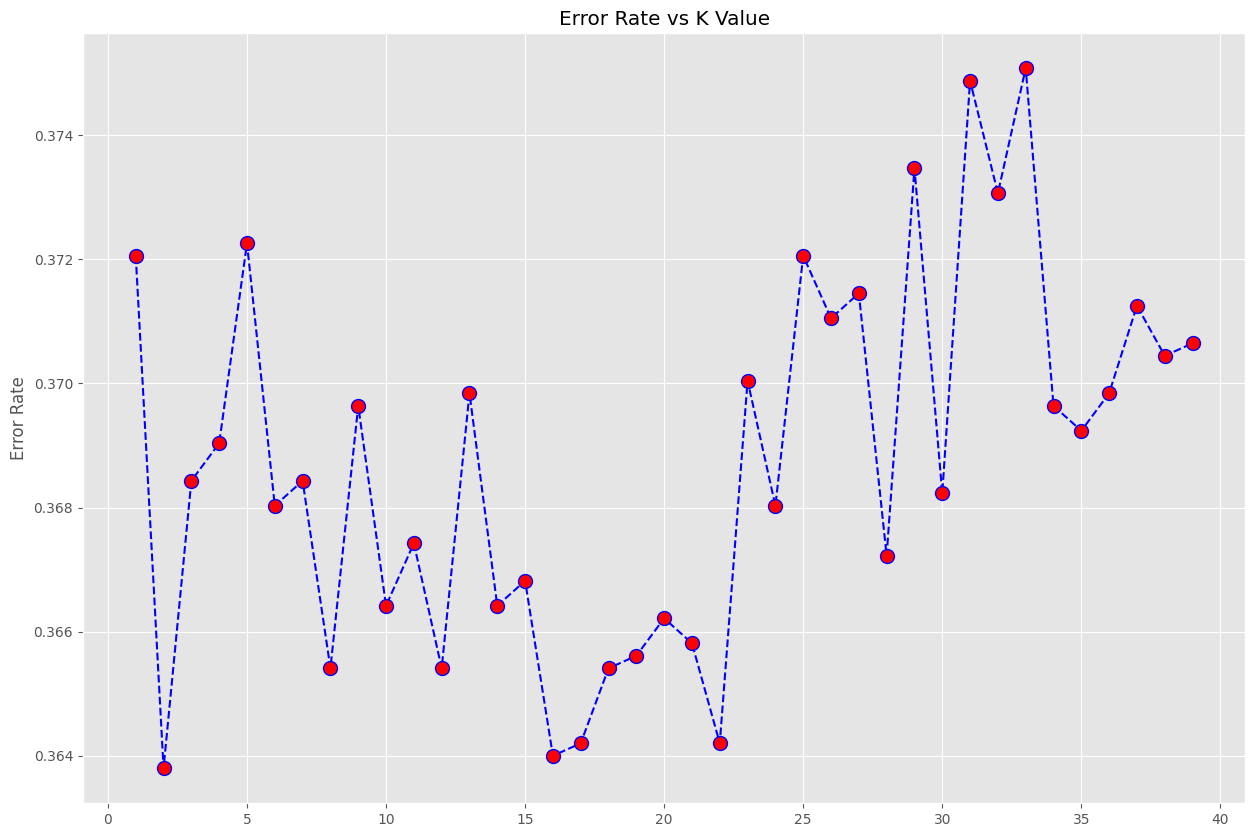

In [69]:
error_rate=list()
#here we iterate meny different k values and plot their error rates
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      2525
           1       0.65      0.57      0.61      2442

    accuracy                           0.64      4967
   macro avg       0.64      0.63      0.63      4967
weighted avg       0.64      0.64      0.63      4967



In [71]:
print(confusion_matrix(y_test, predictions))

[[1762  763]
 [1046 1396]]


<Axes: title={'center': 'Confusion Matrix Result of KNN Predictions'}>

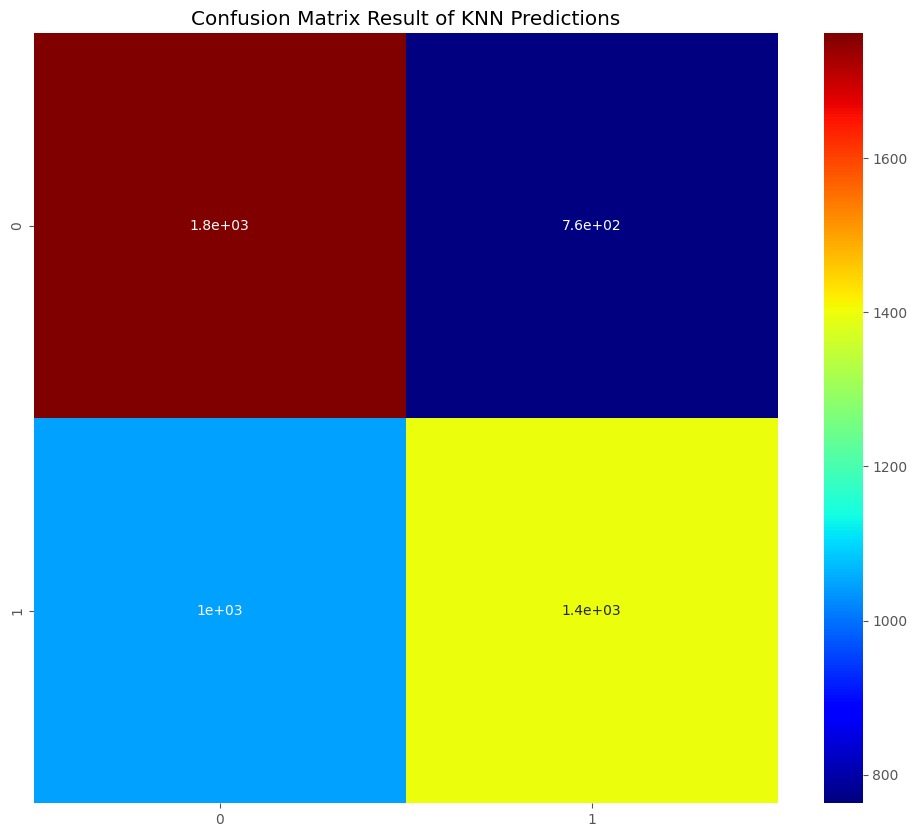

In [72]:
import seaborn as sns
plt.figure(figsize=(12,10))
plt.title("Confusion Matrix Result of KNN Predictions")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="jet")